<a href="https://colab.research.google.com/github/mariummaysha/CVPR-22471971/blob/main/Assignment001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tqdm import tqdm
from collections import Counter
%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/animals'

In [ ]:
classNames = os.listdir(path)
classNames

['cats', 'dogs', 'panda']

In [ ]:
images = []
for c in classNames:
    classPath = os.path.join(path, c)
    label = classNames.index(c)
    for i in tqdm(os.listdir(classPath)):
        image = cv2.imread(os.path.join(classPath,i),cv2.IMREAD_GRAYSCALE)
        resizeImage = cv2.resize(image,(32,32))
        images.append([resizeImage,label])

100%|██████████| 1000/1000 [00:19<00:00, 51.66it/s]


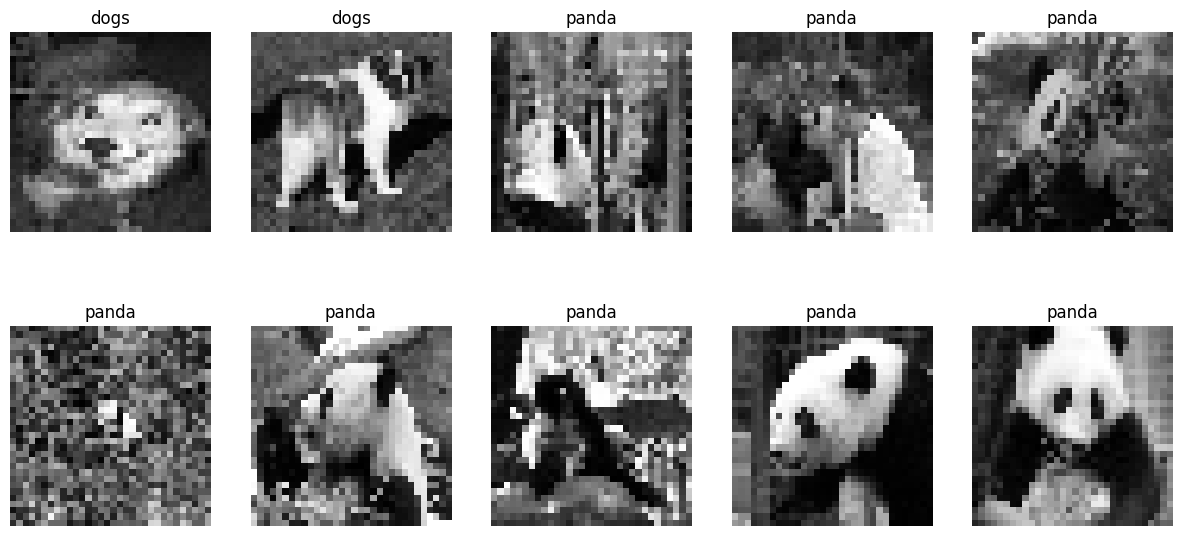

In [ ]:
random.shuffle(images)
plt.figure(figsize=(15,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.axis("off")
    plt.title(classNames[images[i][1]])
plt.show()

In [ ]:
len(images)

3000

In [ ]:
f1 = images[0:600]
f2 = images[600:1200]
f3 = images[1200:1800]
f4 = images[1800:2400]
f5 = images[2400:3000]
folds = [f1,f2,f3,f4,f5]

In [ ]:
def euclidean_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

def manhattan_distance(img1, img2):
    return np.sum(np.abs(img1-img2))

In [ ]:
def predict(query_image,train_data,k,dis_matrix):
    distances = []
    for image, label in train_data:
        if dis_matrix =='e':
            distance = euclidean_distance(query_image[0], image)
            distances.append((distance,label))
        else:
            distance = manhattan_distance(query_image[0], image)
            distances.append((distance,label))

    distances.sort(key= lambda x : x[0])
    k_nearst_label = [label for _, label in distances[:k]]
    major_label = Counter(k_nearst_label).most_common(1)[0][0]
    return major_label

In [ ]:
def pred_accuracy(train_folds, validation_fold, k, dis_matrix):
    right_pred = 0
    train_data = [fold for folds in train_folds for fold in folds]
    for image, label in validation_fold:
        pred_label = predict(image,train_data,k,dis_matrix)
        if pred_label == label:
            right_pred +=1
    total_pred = len(validation_fold)
    accuracy = right_pred/total_pred
    return accuracy

In [ ]:
def cross_val(folds,k,dis_matrix):
    accuracies = []
    for i in range(5):
        validation_fold = folds[i]
        train_folds = [fold for j, fold in enumerate(folds) if j != i]
        accuracy = pred_accuracy(train_folds, validation_fold, k,dis_matrix)
        accuracies.append(accuracy)
        print(f"Fold {i+1} Accuracy: {accuracy * 100:.2f}%")
    return accuracies

In [ ]:
k_values = range(1, 21)
eu_accuracies = []
mn_accuracies = []

In [ ]:
print('Euclidean Distance:')
for k in k_values:
    print(f'Accuracy for k={k}:')
    eu_accuracies.append(cross_val(folds,k,'e'))

Euclidean Distance:
Accuracy for k=1:
Fold 1 Accuracy: 35.33%
Fold 2 Accuracy: 35.33%
Fold 3 Accuracy: 36.17%
Fold 4 Accuracy: 37.00%
Fold 5 Accuracy: 36.50%
Accuracy for k=2:
Fold 1 Accuracy: 35.33%
Fold 2 Accuracy: 35.33%
Fold 3 Accuracy: 36.17%
Fold 4 Accuracy: 37.00%
Fold 5 Accuracy: 36.50%
Accuracy for k=3:
Fold 1 Accuracy: 33.67%
Fold 2 Accuracy: 35.00%
Fold 3 Accuracy: 38.00%
Fold 4 Accuracy: 36.33%
Fold 5 Accuracy: 37.33%
Accuracy for k=4:
Fold 1 Accuracy: 35.50%
Fold 2 Accuracy: 35.83%
Fold 3 Accuracy: 36.50%
Fold 4 Accuracy: 37.00%
Fold 5 Accuracy: 35.50%
Accuracy for k=5:
Fold 1 Accuracy: 35.50%
Fold 2 Accuracy: 35.33%
Fold 3 Accuracy: 38.17%
Fold 4 Accuracy: 36.50%
Fold 5 Accuracy: 35.83%
Accuracy for k=6:
Fold 1 Accuracy: 34.83%
Fold 2 Accuracy: 33.83%
Fold 3 Accuracy: 37.50%
Fold 4 Accuracy: 37.83%
Fold 5 Accuracy: 36.83%
Accuracy for k=7:
Fold 1 Accuracy: 34.83%
Fold 2 Accuracy: 36.17%
Fold 3 Accuracy: 36.00%
Fold 4 Accuracy: 36.17%
Fold 5 Accuracy: 36.83%
Accuracy for k

In [ ]:
print('Manhattan Distance:')
for k in k_values:
    print(f'Accuracy for k={k}:')
    mn_accuracies.append(cross_val(folds,k,'m'))

Manhattan Distance:
Accuracy for k=1:
Fold 1 Accuracy: 32.67%
Fold 2 Accuracy: 32.00%
Fold 3 Accuracy: 34.83%
Fold 4 Accuracy: 38.50%
Fold 5 Accuracy: 35.17%
Accuracy for k=2:
Fold 1 Accuracy: 32.67%
Fold 2 Accuracy: 32.00%
Fold 3 Accuracy: 34.83%
Fold 4 Accuracy: 38.50%
Fold 5 Accuracy: 35.17%
Accuracy for k=3:
Fold 1 Accuracy: 34.83%
Fold 2 Accuracy: 31.50%
Fold 3 Accuracy: 31.50%
Fold 4 Accuracy: 38.67%
Fold 5 Accuracy: 35.33%
Accuracy for k=4:
Fold 1 Accuracy: 36.17%
Fold 2 Accuracy: 31.50%
Fold 3 Accuracy: 32.50%
Fold 4 Accuracy: 38.33%
Fold 5 Accuracy: 36.33%
Accuracy for k=5:
Fold 1 Accuracy: 37.50%
Fold 2 Accuracy: 31.00%
Fold 3 Accuracy: 34.67%
Fold 4 Accuracy: 39.17%
Fold 5 Accuracy: 36.67%
Accuracy for k=6:
Fold 1 Accuracy: 36.17%
Fold 2 Accuracy: 33.00%
Fold 3 Accuracy: 34.50%
Fold 4 Accuracy: 39.17%
Fold 5 Accuracy: 34.00%
Accuracy for k=7:
Fold 1 Accuracy: 36.83%
Fold 2 Accuracy: 32.67%
Fold 3 Accuracy: 33.33%
Fold 4 Accuracy: 40.17%
Fold 5 Accuracy: 36.17%
Accuracy for k

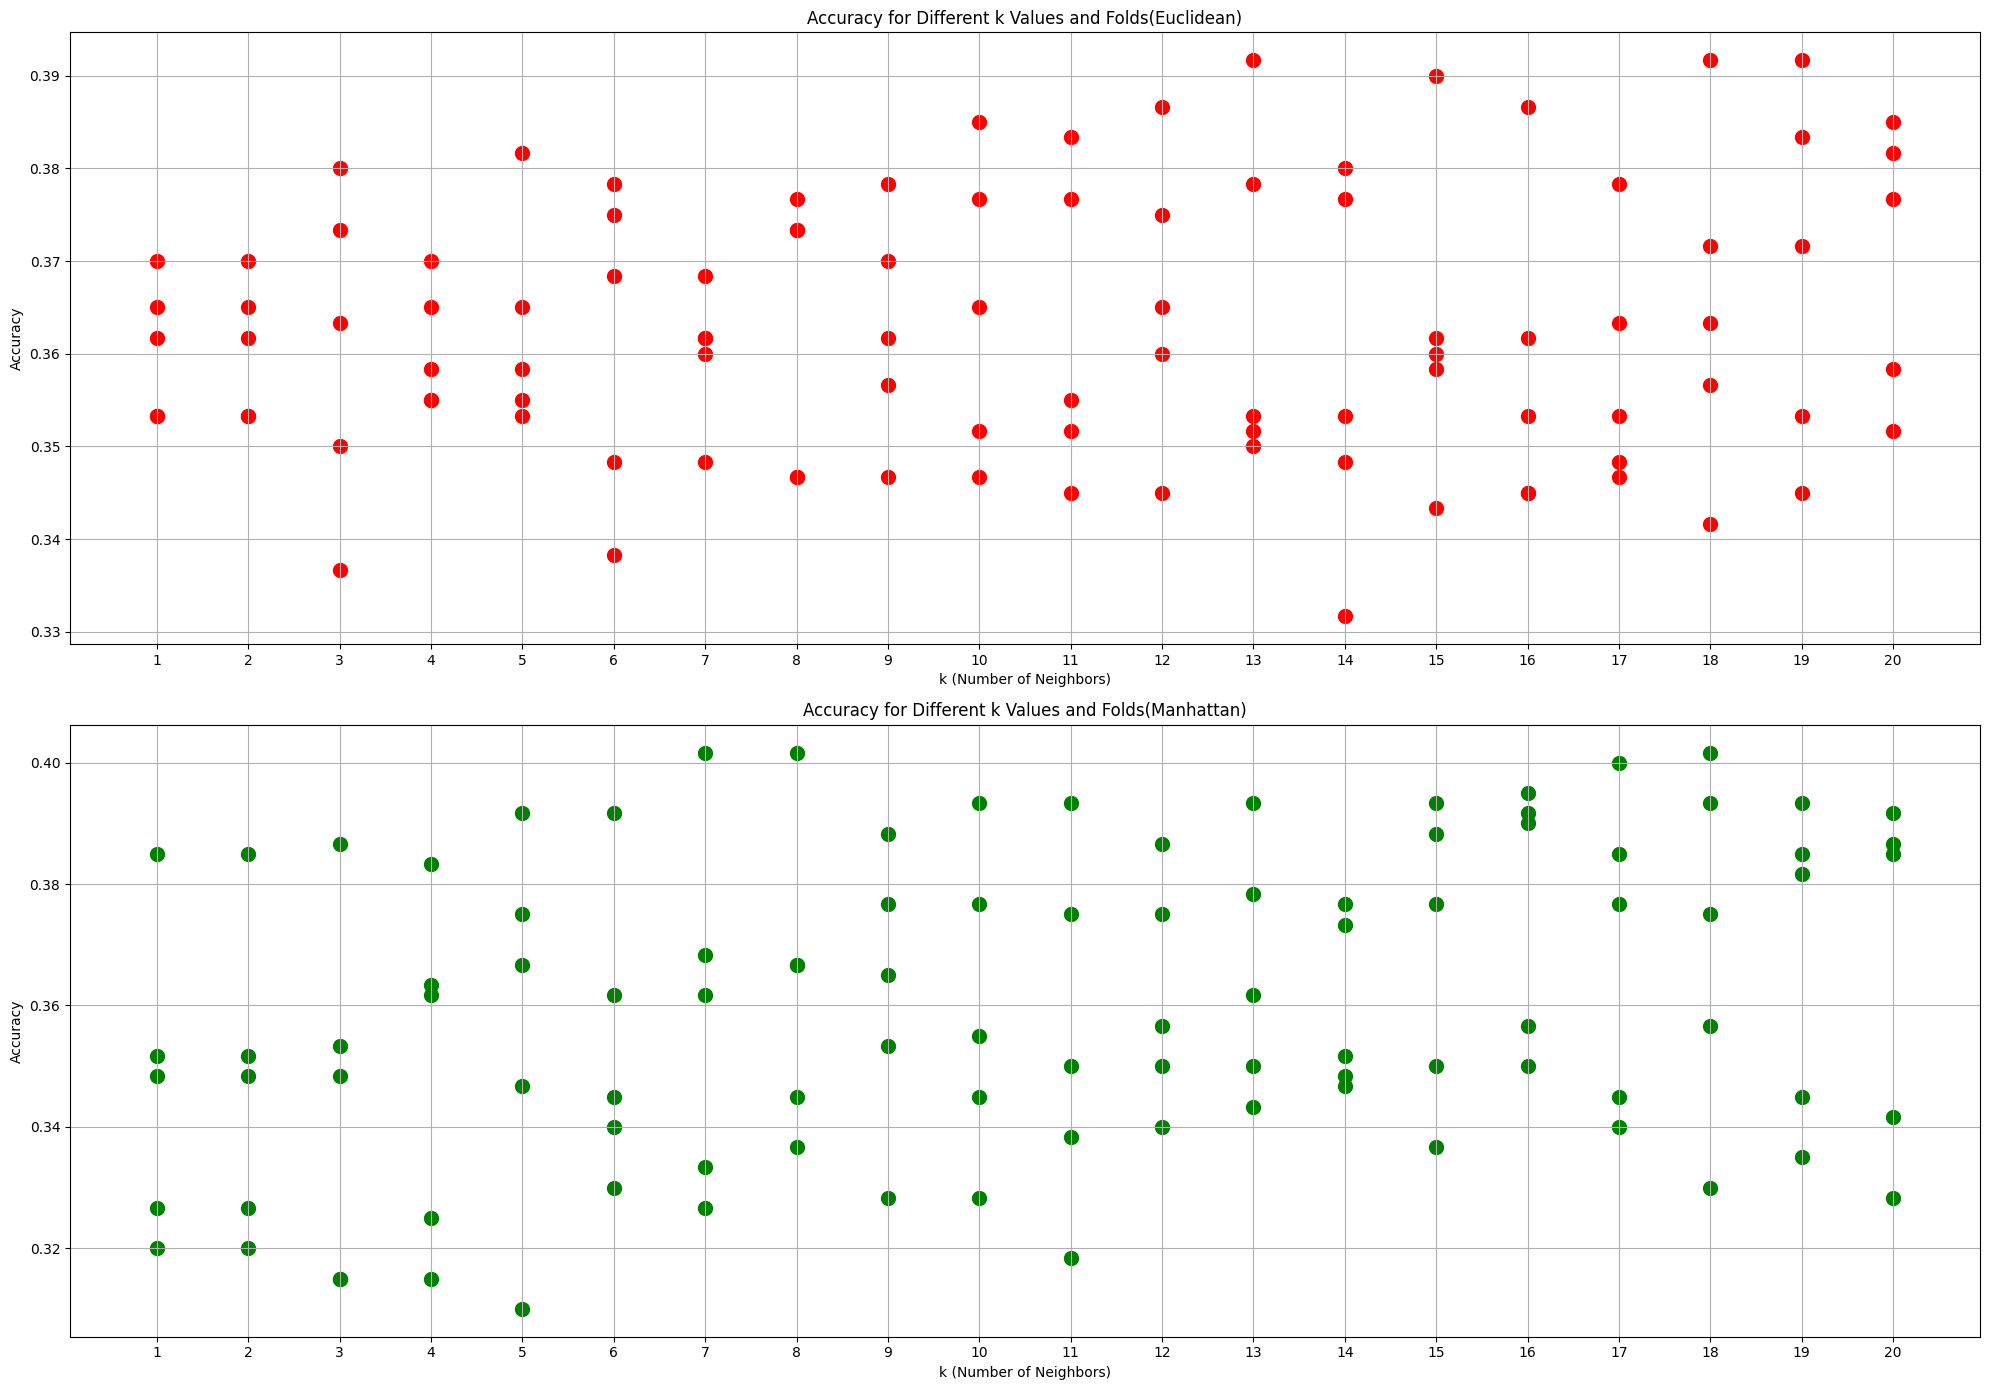

In [ ]:
# Convert accuracies to a NumPy array for easier manipulation
eu_accuracies = np.array(eu_accuracies)
mn_accuracies = np.array(mn_accuracies)

plt.figure(figsize=(20, 14))


# Plotting scatter plot for each k value
for i, k in enumerate(k_values):
    plt.subplot(2,1,1)
    plt.scatter([k] * eu_accuracies.shape[1], eu_accuracies[i], color='red', label=f'k={k}', s=100)

# Plot configurations
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different k Values and Folds(Euclidean)')
plt.xticks(k_values)
plt.grid(True)

for i, k in enumerate(k_values):
    plt.subplot(2,1,2)
    plt.scatter([k] * mn_accuracies.shape[1], mn_accuracies[i], color='green', label=f'k={k}', s=100)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different k Values and Folds(Manhattan)')
plt.xticks(k_values)
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
print(f'Avarage accuracey of Euclidean Distance : {np.average(eu_accuracies)*100:.3f}%')
print(f'Avarage accuracey of Manhattan Distance : {np.average(mn_accuracies)*100:.3f}%')

Avarage accuracey of Euclidean Distance : 36.267%
Avarage accuracey of Manhattan Distance : 36.018%
